## Import Dependencies

In [62]:
import pandas as pd
from sqlalchemy import create_engine
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

## Store Platform CSVs to DFs

In [63]:
csv_file = "Resources/all_platforms.csv"
all_platforms_df = pd.read_csv(csv_file)
all_platforms_df.head()

,Date,Facebook,Pinterest,StumbleUpon,Twitter,reddit,Tumblr,YouTube,Instagram,LinkedIn,Digg,MySpace,Fark,Google+,NowPublic,news.ycombinator.com,Delicious,VKontakte,Vimeo,Other
0,2009-04,12.89,0.0,42.45,6.69,9.83,0.0,0.0,0.0,0.00,6.02,19.04,0.30,0.0,0.03,0.08,0.38,0.0,0.0,2.30
1,2009-05,15.88,0.0,42.55,10.45,9.10,0.0,0.0,0.0,0.27,6.85,11.06,0.65,0.0,0.04,0.12,0.46,0.0,0.0,2.57
2,2009-06,17.02,0.0,38.08,11.25,14.80,0.0,0.0,0.0,0.50,5.17,9.46,1.03,0.0,0.05,0.12,0.47,0.0,0.0,2.06
3,2009-07,19.08,0.0,43.41,10.55,11.64,0.0,0.0,0.0,0.40,5.05,6.86,0.34,0.0,0.05,0.15,0.43,0.0,0.0,2.04
4,2009-08,24.45,0.0,38.84,11.37,11.85,0.0,0.0,0.0,0.45,3.92,5.85,0.64,0.0,0.08,0.09,0.41,0.0,0.0,2.06


In [64]:
csv_file_2 = "Resources/console.csv"
console_df = pd.read_csv(csv_file_2)
console_df.head()

,Date,Facebook,reddit,Tumblr,YouTube,Twitter,Pinterest,StumbleUpon,Instagram,Google+,VKontakte,NowPublic,Fark,Vimeo,LinkedIn,Other
0,2012-08,79.24,1.93,0.0,12.37,1.65,0.98,1.74,0.0,0.0,0.0,1.10,0.02,0.82,0.01,0.12
1,2012-09,75.34,3.15,0.0,13.23,2.31,1.22,2.97,0.0,0.0,0.0,1.10,0.05,0.45,0.01,0.17
2,2012-10,57.16,3.18,0.0,26.70,6.23,1.43,2.92,0.0,0.0,0.0,1.42,0.07,0.68,0.02,0.18
3,2012-11,57.54,3.59,0.0,32.05,1.48,1.05,1.96,0.0,0.0,0.0,0.72,0.14,1.09,0.03,0.36
4,2012-12,56.82,4.51,0.0,31.12,2.62,2.03,1.88,0.0,0.0,0.0,0.60,0.10,0.12,0.02,0.17


In [65]:
csv_file_3 = "Resources/Desktop_201001-202112.csv"
desktop_df = pd.read_csv(csv_file_3)
desktop_df.head()

,Date,Facebook,StumbleUpon,Pinterest,Twitter,reddit,Tumblr,YouTube,Digg,LinkedIn,...,MySpace,Google+,NowPublic,Instagram,news.ycombinator.com,Delicious,VKontakte,Vimeo,orkut,Other
0,2010-01,48.03,30.33,0.0,5.86,5.75,0.0,4.83,2.90,0.25,...,0.60,0.0,0.08,0.0,0.08,0.24,0.0,0.02,0.21,0.43
1,2010-02,40.42,33.79,0.0,7.59,5.27,0.0,5.05,3.30,0.31,...,1.18,0.0,1.55,0.0,0.16,0.28,0.0,0.03,0.18,0.43
2,2010-03,30.79,41.43,0.0,8.59,6.31,0.0,4.43,2.14,0.35,...,2.91,0.0,1.41,0.0,0.16,0.35,0.0,0.06,0.17,0.33
3,2010-04,34.86,38.20,0.0,7.30,5.49,0.0,3.15,2.05,0.29,...,6.20,0.0,0.97,0.0,0.14,0.30,0.0,0.03,0.13,0.32
4,2010-05,39.24,35.63,0.0,6.75,5.92,0.0,3.48,1.86,0.26,...,4.61,0.0,0.88,0.0,0.15,0.26,0.0,0.03,0.13,0.25


In [66]:
csv_file_4 = "Resources/mobile_social_media.csv"
mobile_df = pd.read_csv(csv_file_4)
mobile_df.head()

,Date,Facebook,Pinterest,Twitter,Instagram,StumbleUpon,YouTube,reddit,Tumblr,LinkedIn,Google+,Fark,Digg,NowPublic,news.ycombinator.com,Other
0,2009-04,18.27,0.0,23.64,0.0,0.94,0.0,20.60,0.0,0.00,0.0,0.86,15.51,0.06,0.58,19.53
1,2009-05,19.29,0.0,37.61,0.0,1.95,0.0,15.07,0.0,0.48,0.0,1.58,12.56,0.08,1.00,10.38
2,2009-06,19.32,0.0,35.45,0.0,0.97,0.0,21.03,0.0,0.61,0.0,2.21,13.37,0.10,0.58,6.36
3,2009-07,24.80,0.0,31.96,0.0,1.69,0.0,15.90,0.0,0.58,0.0,0.87,16.26,0.12,0.84,6.96
4,2009-08,31.70,0.0,28.85,0.0,0.88,0.0,21.50,0.0,0.61,0.0,1.19,9.63,0.17,0.37,5.10


In [67]:
csv_file_5 = "Resources/US_tablet_data.csv"
tablet_df = pd.read_csv(csv_file_5)
tablet_df.head()

,Date,Facebook,Pinterest,Twitter,StumbleUpon,Tumblr,reddit,YouTube,Instagram,Google+,Fark,LinkedIn,Digg,Other
0,2012-09,21.27,71.46,1.58,2.20,0.0,2.54,0.44,0.0,0.0,0.10,0.15,0.04,0.23
1,2012-10,17.55,73.79,3.24,1.66,0.0,2.56,0.71,0.0,0.0,0.09,0.12,0.04,0.24
2,2012-11,19.26,70.49,2.90,3.90,0.0,2.26,0.67,0.0,0.0,0.12,0.09,0.02,0.27
3,2012-12,21.31,64.42,4.56,6.90,0.0,1.95,0.46,0.0,0.0,0.08,0.11,0.03,0.18
4,2013-01,20.94,64.73,4.92,6.84,0.0,1.86,0.37,0.0,0.0,0.08,0.09,0.02,0.16


## Reduce DFs to relevant columns

In [68]:
reduced_platforms_df = all_platforms_df[["Date", "Facebook", "Twitter",
                                    "Instagram", "Google+", "YouTube", "reddit"]]
reduced_platforms_df

,Date,Facebook,Twitter,Instagram,Google+,YouTube,reddit
0,2009-04,12.89,6.69,0.00,0.0,0.00,9.83
1,2009-05,15.88,10.45,0.00,0.0,0.00,9.10
2,2009-06,17.02,11.25,0.00,0.0,0.00,14.80
3,2009-07,19.08,10.55,0.00,0.0,0.00,11.64
4,2009-08,24.45,11.37,0.00,0.0,0.00,11.85
...,...,...,...,...,...,...,...
150,2021-10,70.81,8.89,5.21,0.0,1.51,1.11
151,2021-11,66.72,10.99,5.92,0.0,1.60,1.62
152,2021-12,70.56,9.65,5.21,0.0,1.35,1.18
153,2022-01,73.78,8.32,5.58,0.0,1.42,1.07


In [69]:
reduced_console_df = console_df[["Date", "Facebook", "Twitter",
                                    "Instagram", "Google+", "YouTube", "reddit"]]
reduced_console_df

,Date,Facebook,Twitter,Instagram,Google+,YouTube,reddit
0,2012-08,79.24,1.65,0.0,0.0,12.37,1.93
1,2012-09,75.34,2.31,0.0,0.0,13.23,3.15
2,2012-10,57.16,6.23,0.0,0.0,26.70,3.18
3,2012-11,57.54,1.48,0.0,0.0,32.05,3.59
4,2012-12,56.82,2.62,0.0,0.0,31.12,4.51
...,...,...,...,...,...,...,...
150,2012-03,0.00,0.00,0.0,0.0,0.00,0.00
151,2012-04,0.00,0.00,0.0,0.0,0.00,0.00
152,2012-05,0.00,0.00,0.0,0.0,0.00,0.00
153,2012-06,0.00,0.00,0.0,0.0,0.00,0.00


In [70]:
reduced_desktop_df = desktop_df[["Date", "Facebook", "Twitter",
                                    "Instagram", "Google+", "YouTube", "reddit"]]
reduced_desktop_df

,Date,Facebook,Twitter,Instagram,Google+,YouTube,reddit
0,2010-01,48.03,5.86,0.00,0.0,4.83,5.75
1,2010-02,40.42,7.59,0.00,0.0,5.05,5.27
2,2010-03,30.79,8.59,0.00,0.0,4.43,6.31
3,2010-04,34.86,7.30,0.00,0.0,3.15,5.49
4,2010-05,39.24,6.75,0.00,0.0,3.48,5.92
...,...,...,...,...,...,...,...
139,2021-08,43.53,17.77,1.16,0.0,4.36,3.48
140,2021-09,43.02,16.49,1.42,0.0,4.24,3.49
141,2021-10,44.10,15.72,1.52,0.0,4.42,3.63
142,2021-11,40.15,17.03,1.51,0.0,5.10,4.13


In [71]:
reduced_mobile_df = mobile_df[["Date", "Facebook", "Twitter",
                                    "Instagram", "Google+", "YouTube", "reddit"]]
reduced_mobile_df

,Date,Facebook,Twitter,Instagram,Google+,YouTube,reddit
0,2009-04,18.27,23.64,0.00,0.0,0.00,20.60
1,2009-05,19.29,37.61,0.00,0.0,0.00,15.07
2,2009-06,19.32,35.45,0.00,0.0,0.00,21.03
3,2009-07,24.80,31.96,0.00,0.0,0.00,15.90
4,2009-08,31.70,28.85,0.00,0.0,0.00,21.50
...,...,...,...,...,...,...,...
150,2021-10,74.59,8.07,5.91,0.0,1.07,0.76
151,2021-11,70.29,10.37,6.74,0.0,1.07,1.29
152,2021-12,74.00,8.96,5.87,0.0,0.92,0.78
153,2022-01,77.20,7.58,6.20,0.0,1.00,0.69


In [72]:
reduced_tablet_df = tablet_df[["Date", "Facebook", "Twitter",
                                    "Instagram", "Google+", "YouTube", "reddit"]]
reduced_tablet_df

,Date,Facebook,Twitter,Instagram,Google+,YouTube,reddit
0,2012-09,21.27,1.58,0.00,0.0,0.44,2.54
1,2012-10,17.55,3.24,0.00,0.0,0.71,2.56
2,2012-11,19.26,2.90,0.00,0.0,0.67,2.26
3,2012-12,21.31,4.56,0.00,0.0,0.46,1.95
4,2013-01,20.94,4.92,0.00,0.0,0.37,1.86
...,...,...,...,...,...,...,...
107,2021-08,78.92,3.56,1.03,0.0,1.53,0.29
108,2021-09,79.32,3.43,1.29,0.0,1.29,0.26
109,2021-10,77.25,3.65,1.81,0.0,1.38,0.33
110,2021-11,75.28,4.47,2.10,0.0,1.66,0.50


## Add identifying column for later appending and merging

In [73]:
reduced_platforms_df['Device'] = 'all'
reduced_platforms_df

C:\Users\erika\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Facebook,Twitter,Instagram,Google+,YouTube,reddit,Device
0,2009-04,12.89,6.69,0.00,0.0,0.00,9.83,all
1,2009-05,15.88,10.45,0.00,0.0,0.00,9.10,all
2,2009-06,17.02,11.25,0.00,0.0,0.00,14.80,all
3,2009-07,19.08,10.55,0.00,0.0,0.00,11.64,all
4,2009-08,24.45,11.37,0.00,0.0,0.00,11.85,all
...,...,...,...,...,...,...,...,...
150,2021-10,70.81,8.89,5.21,0.0,1.51,1.11,all
151,2021-11,66.72,10.99,5.92,0.0,1.60,1.62,all
152,2021-12,70.56,9.65,5.21,0.0,1.35,1.18,all
153,2022-01,73.78,8.32,5.58,0.0,1.42,1.07,all


In [74]:
reduced_console_df['Device'] = 'console'
reduced_console_df

C:\Users\erika\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Facebook,Twitter,Instagram,Google+,YouTube,reddit,Device
0,2012-08,79.24,1.65,0.0,0.0,12.37,1.93,console
1,2012-09,75.34,2.31,0.0,0.0,13.23,3.15,console
2,2012-10,57.16,6.23,0.0,0.0,26.70,3.18,console
3,2012-11,57.54,1.48,0.0,0.0,32.05,3.59,console
4,2012-12,56.82,2.62,0.0,0.0,31.12,4.51,console
...,...,...,...,...,...,...,...,...
150,2012-03,0.00,0.00,0.0,0.0,0.00,0.00,console
151,2012-04,0.00,0.00,0.0,0.0,0.00,0.00,console
152,2012-05,0.00,0.00,0.0,0.0,0.00,0.00,console
153,2012-06,0.00,0.00,0.0,0.0,0.00,0.00,console


In [75]:
reduced_desktop_df['Device'] = 'desktop'
reduced_desktop_df

C:\Users\erika\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Facebook,Twitter,Instagram,Google+,YouTube,reddit,Device
0,2010-01,48.03,5.86,0.00,0.0,4.83,5.75,desktop
1,2010-02,40.42,7.59,0.00,0.0,5.05,5.27,desktop
2,2010-03,30.79,8.59,0.00,0.0,4.43,6.31,desktop
3,2010-04,34.86,7.30,0.00,0.0,3.15,5.49,desktop
4,2010-05,39.24,6.75,0.00,0.0,3.48,5.92,desktop
...,...,...,...,...,...,...,...,...
139,2021-08,43.53,17.77,1.16,0.0,4.36,3.48,desktop
140,2021-09,43.02,16.49,1.42,0.0,4.24,3.49,desktop
141,2021-10,44.10,15.72,1.52,0.0,4.42,3.63,desktop
142,2021-11,40.15,17.03,1.51,0.0,5.10,4.13,desktop


In [76]:
reduced_mobile_df['Device'] = 'mobile'
reduced_mobile_df

C:\Users\erika\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Facebook,Twitter,Instagram,Google+,YouTube,reddit,Device
0,2009-04,18.27,23.64,0.00,0.0,0.00,20.60,mobile
1,2009-05,19.29,37.61,0.00,0.0,0.00,15.07,mobile
2,2009-06,19.32,35.45,0.00,0.0,0.00,21.03,mobile
3,2009-07,24.80,31.96,0.00,0.0,0.00,15.90,mobile
4,2009-08,31.70,28.85,0.00,0.0,0.00,21.50,mobile
...,...,...,...,...,...,...,...,...
150,2021-10,74.59,8.07,5.91,0.0,1.07,0.76,mobile
151,2021-11,70.29,10.37,6.74,0.0,1.07,1.29,mobile
152,2021-12,74.00,8.96,5.87,0.0,0.92,0.78,mobile
153,2022-01,77.20,7.58,6.20,0.0,1.00,0.69,mobile


In [77]:
reduced_tablet_df['Device'] = 'tablet'
reduced_tablet_df

C:\Users\erika\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Facebook,Twitter,Instagram,Google+,YouTube,reddit,Device
0,2012-09,21.27,1.58,0.00,0.0,0.44,2.54,tablet
1,2012-10,17.55,3.24,0.00,0.0,0.71,2.56,tablet
2,2012-11,19.26,2.90,0.00,0.0,0.67,2.26,tablet
3,2012-12,21.31,4.56,0.00,0.0,0.46,1.95,tablet
4,2013-01,20.94,4.92,0.00,0.0,0.37,1.86,tablet
...,...,...,...,...,...,...,...,...
107,2021-08,78.92,3.56,1.03,0.0,1.53,0.29,tablet
108,2021-09,79.32,3.43,1.29,0.0,1.29,0.26,tablet
109,2021-10,77.25,3.65,1.81,0.0,1.38,0.33,tablet
110,2021-11,75.28,4.47,2.10,0.0,1.66,0.50,tablet


## Append Platform DFs

In [78]:
devices_df = reduced_platforms_df.append(reduced_console_df)
devices_df

,Date,Facebook,Twitter,Instagram,Google+,YouTube,reddit,Device
0,2009-04,12.89,6.69,0.0,0.0,0.0,9.83,all
1,2009-05,15.88,10.45,0.0,0.0,0.0,9.10,all
2,2009-06,17.02,11.25,0.0,0.0,0.0,14.80,all
3,2009-07,19.08,10.55,0.0,0.0,0.0,11.64,all
4,2009-08,24.45,11.37,0.0,0.0,0.0,11.85,all
...,...,...,...,...,...,...,...,...
150,2012-03,0.00,0.00,0.0,0.0,0.0,0.00,console
151,2012-04,0.00,0.00,0.0,0.0,0.0,0.00,console
152,2012-05,0.00,0.00,0.0,0.0,0.0,0.00,console
153,2012-06,0.00,0.00,0.0,0.0,0.0,0.00,console


In [79]:
devices_2_df = devices_df.append(reduced_desktop_df)
devices_2_df

,Date,Facebook,Twitter,Instagram,Google+,YouTube,reddit,Device
0,2009-04,12.89,6.69,0.00,0.0,0.00,9.83,all
1,2009-05,15.88,10.45,0.00,0.0,0.00,9.10,all
2,2009-06,17.02,11.25,0.00,0.0,0.00,14.80,all
3,2009-07,19.08,10.55,0.00,0.0,0.00,11.64,all
4,2009-08,24.45,11.37,0.00,0.0,0.00,11.85,all
...,...,...,...,...,...,...,...,...
139,2021-08,43.53,17.77,1.16,0.0,4.36,3.48,desktop
140,2021-09,43.02,16.49,1.42,0.0,4.24,3.49,desktop
141,2021-10,44.10,15.72,1.52,0.0,4.42,3.63,desktop
142,2021-11,40.15,17.03,1.51,0.0,5.10,4.13,desktop


In [80]:
devices_3_df = devices_2_df.append(reduced_tablet_df)
devices_3_df

,Date,Facebook,Twitter,Instagram,Google+,YouTube,reddit,Device
0,2009-04,12.89,6.69,0.00,0.0,0.00,9.83,all
1,2009-05,15.88,10.45,0.00,0.0,0.00,9.10,all
2,2009-06,17.02,11.25,0.00,0.0,0.00,14.80,all
3,2009-07,19.08,10.55,0.00,0.0,0.00,11.64,all
4,2009-08,24.45,11.37,0.00,0.0,0.00,11.85,all
...,...,...,...,...,...,...,...,...
107,2021-08,78.92,3.56,1.03,0.0,1.53,0.29,tablet
108,2021-09,79.32,3.43,1.29,0.0,1.29,0.26,tablet
109,2021-10,77.25,3.65,1.81,0.0,1.38,0.33,tablet
110,2021-11,75.28,4.47,2.10,0.0,1.66,0.50,tablet


In [81]:
devices_4_df = devices_3_df.append(reduced_mobile_df)
devices_4_df

,Date,Facebook,Twitter,Instagram,Google+,YouTube,reddit,Device
0,2009-04,12.89,6.69,0.00,0.0,0.00,9.83,all
1,2009-05,15.88,10.45,0.00,0.0,0.00,9.10,all
2,2009-06,17.02,11.25,0.00,0.0,0.00,14.80,all
3,2009-07,19.08,10.55,0.00,0.0,0.00,11.64,all
4,2009-08,24.45,11.37,0.00,0.0,0.00,11.85,all
...,...,...,...,...,...,...,...,...
150,2021-10,74.59,8.07,5.91,0.0,1.07,0.76,mobile
151,2021-11,70.29,10.37,6.74,0.0,1.07,1.29,mobile
152,2021-12,74.00,8.96,5.87,0.0,0.92,0.78,mobile
153,2022-01,77.20,7.58,6.20,0.0,1.00,0.69,mobile


In [82]:
reduce_devices_4_df = reduced_platforms_df[["Facebook", "Twitter", "Instagram", "Google+", "YouTube", "reddit"]]
# reduce_devices_4_df.head()
sum_fb = reduce_devices_4_df["Facebook"].mean()
sum_t = reduce_devices_4_df["Twitter"].mean()
sum_i = reduce_devices_4_df["Instagram"].mean()
sum_g = reduce_devices_4_df["Google+"].mean()
sum_y = reduce_devices_4_df["YouTube"].mean()
sum_r = reduce_devices_4_df["reddit"].mean()

In [83]:
totalsummary_df = pd.DataFrame({
    "Facebook": [sum_fb],
    "Twitter": [sum_t],
    "Instagram": [sum_i],
    "Google+": [sum_g],
    "Youtube": [sum_y],
    "reddit": [sum_r]
})
totalsummary_df.round(2)

,Facebook,Twitter,Instagram,Google+,Youtube,reddit
0,55.26,7.74,1.18,0.08,2.08,3.07


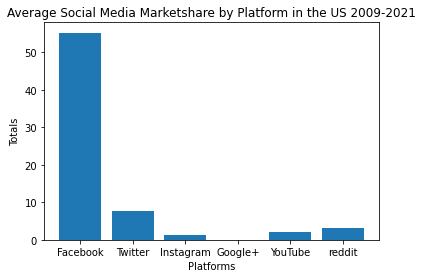

In [84]:
type_platforms = ["Facebook", "Twitter", "Instagram", "Google+", "YouTube", "reddit"]
numbers = [55.26, 7.74, 1.18, 0.08, 2.08, 3.07]
x_axis = np.arange(len(type_platforms))

plt.bar(type_platforms, numbers, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, type_platforms)

plt.title("Average Social Media Marketshare by Platform in the US 2009-2021")
plt.xlabel("Platforms")
plt.ylabel("Totals")
plt.show()

In [85]:
retail_12_file = "Resources/retail_food_12.csv"
retail_12_df = pd.read_csv(retail_12_file)
retail_12_df = retail_12_df.rename(columns={'Kind of Business': 'Date'})
retail_12_df.head()

,Date,"Retail and food services sales, total",Retail sales and food services excl motor vehicle and parts,Retail sales and food services excl gasoline stations,Retail sales and food services excl motor vehicle and parts and gasoline stations,"Retail sales, total","Retail sales, total (excl. motor vehicle and parts dealers)",GAFO(1),Motor vehicle and parts dealers,Automobile and other motor vehicle dealers,...,General merchandise stores.1,Department stores.1,Other general merchandise stores.1,Warehouse clubs and superstores.1,All other gen. merchandise stores.1,Miscellaneous stores retailers,Nonstore retailers.1,Electronic shopping and mail order houses,Fuel dealers.1,Food services and drinking places.1
0,Jan. 2012,"355,184","292,916","313,778","251,510","315,540","253,272","83,395","62,268","55,945",...,"53,149","15,021","38,128","33,275","4,853","9,307","32,433","25,932","2,789","42,858"
1,Feb. 2012,"372,401","302,072","330,183","259,854","331,470","261,141","91,209","70,329","63,622",...,"53,944","15,239","38,705","33,887","4,818","9,411","32,918","26,420","2,742","42,950"
2,Mar. 2012,"414,149","332,992","365,752","284,595","368,502","287,345","98,747","81,157","73,814",...,"53,658","15,182","38,476","33,475","5,001","9,186","32,879","26,365","2,630","42,942"
3,Apr. 2012,"392,949","319,458","345,285","271,794","349,194","275,703","91,719","73,491","66,592",...,"53,285","14,849","38,436","33,589","4,847","9,196","33,207","26,528","2,962","43,365"
4,12-May,"418,608","338,812","369,410","289,614","373,129","293,333","97,833","79,796","72,489",...,"53,154","14,675","38,479","33,673","4,806","8,890","33,790","26,921","3,164","43,313"


In [86]:
reduced_retail_12_df = retail_12_df[["Date", "Retail sales, total", "Electronic shopping and mail order houses", "Electronics and appliance stores", "Clothing stores", "Hobby, toy, and game stores"]]
reduced_retail_12_df

,Date,"Retail sales, total",Electronic shopping and mail order houses,Electronics and appliance stores,Clothing stores,"Hobby, toy, and game stores"
0,Jan. 2012,"315,540","25,932","7,832","10,686","1,072"
1,Feb. 2012,"331,470","26,420","8,256","12,618","1,192"
2,Mar. 2012,"368,502","26,365","8,507","15,205","1,270"
3,Apr. 2012,"349,194","26,528","7,241","14,003","1,156"
4,12-May,"373,129","26,921","7,955","14,593","1,186"
5,Jun. 2012,"356,083","27,065","8,009","14,035","1,130"
6,Jul. 2012,"351,520","27,369","8,190","13,717","1,123"
7,Aug. 2012,"372,986","27,712","8,474","15,157","1,126"
8,Sep. 2012,"342,582","27,937","7,826","13,714","1,158"
9,Oct. 2012,"355,823","27,958","7,657","14,247","1,275"


In [87]:
retail_13_file = "Resources/retail_food_13.csv"
retail_13_df = pd.read_csv(retail_13_file)
retail_13_df = retail_13_df.rename(columns={'Kind of Business': 'Date'})
retail_13_df.head()

,Date,"Retail and food services sales, total",Retail sales and food services excl motor vehicle and parts,Retail sales and food services excl gasoline stations,Retail sales and food services excl motor vehicle and parts and gasoline stations,"Retail sales, total","Retail sales, total (excl. motor vehicle and parts dealers)",GAFO(1),Motor vehicle and parts dealers,Automobile and other motor vehicle dealers,...,General merchandise stores.1,Department stores.1,Other general merchandise stores.1,Warehouse clubs and superstores.1,All other gen. merchandise stores.1,Miscellaneous stores retailers,Nonstore retailers.1,Electronic shopping and mail order houses,Fuel dealers.1,Food services and drinking places.1
0,Jan. 2013,"375,468","306,084","333,706","264,322","333,663","264,279","86,297","69,384","62,999",...,"54,074","14,739","39,335","34,316","5,019","9,223","35,599","28,820","3,033","45,146"
1,Feb. 2013,"373,974","300,849","331,745","258,620","332,471","259,346","89,304","73,125","66,624",...,"54,534","14,544","39,990","34,932","5,058","9,276","35,576","28,624","3,182","44,868"
2,Mar. 2013,"421,748","337,976","374,018","290,246","374,171","290,399","100,628","83,772","76,641",...,"54,236","14,440","39,796","34,733","5,063","9,367","35,421","28,528","3,215","45,011"
3,Apr. 2013,"408,551","326,887","361,736","280,072","362,978","281,314","92,422","81,664","74,547",...,"54,198","14,230","39,968","34,848","5,120","9,322","35,140","28,284","3,219","44,723"
4,13-May,"437,214","350,308","388,019","301,113","389,709","302,803","100,605","86,906","79,448",...,"54,453","14,336","40,117","34,936","5,181","9,319","35,127","28,419","3,012","44,816"


In [88]:
reduced_retail_13_df = retail_13_df[["Date", "Retail sales, total", "Electronic shopping and mail order houses", "Electronics and appliance stores", "Clothing stores", "Hobby, toy, and game stores"]]
reduced_retail_13_df

,Date,"Retail sales, total",Electronic shopping and mail order houses,Electronics and appliance stores,Clothing stores,"Hobby, toy, and game stores"
0,Jan. 2013,"333,663","28,820","8,168","11,297","1,029"
1,Feb. 2013,"332,471","28,624","8,261","12,242","1,079"
2,Mar. 2013,"374,171","28,528","8,288","15,366","1,250"
3,Apr. 2013,"362,978","28,284","7,359","14,103","1,117"
4,13-May,"389,709","28,419","7,892","15,153","1,127"
5,Jun. 2013,"369,355","28,552","7,870","14,128","1,067"
6,Jul. 2013,"377,031","28,819","8,065","14,313","1,118"
7,Aug. 2013,"388,299","28,876","8,403","15,645","1,156"
8,Sep. 2013,"352,749","28,961","7,854","13,471","1,172"
9,Oct. 2013,"369,868","28,703","8,030","14,816","1,351"


In [89]:
retail_14_file = "Resources/retail_food_14.csv"
retail_14_df = pd.read_csv(retail_14_file)
retail_14_df = retail_14_df.rename(columns={'Kind of Business': 'Date'})
retail_14_df.head()

,Date,"Retail and food services sales, total",Retail sales and food services excl motor vehicle and parts,Retail sales and food services excl gasoline stations,Retail sales and food services excl motor vehicle and parts and gasoline stations,"Retail sales, total","Retail sales, total (excl. motor vehicle and parts dealers)",GAFO(1),Motor vehicle and parts dealers,Automobile and other motor vehicle dealers,...,General merchandise stores.1,Department stores.1,Other general merchandise stores.1,Warehouse clubs and superstores.1,All other gen. merchandise stores.1,Miscellaneous stores retailers,Nonstore retailers.1,Electronic shopping and mail order houses,Fuel dealers.1,Food services and drinking places.1
0,Jan. 2014,"383,488","312,728","340,831","270,071","340,558","269,798","86,320","70,760","64,116",...,"54,538","13,711","40,827","35,553","5,274","9,251","36,326","28,722","3,945","45,914"
1,Feb. 2014,"380,454","305,069","339,775","264,390","337,558","262,173","89,550","75,385","68,681",...,"55,390","14,153","41,237","35,887","5,350","9,387","37,254","29,572","3,992","46,424"
2,Mar. 2014,"433,052","342,056","386,653","295,657","383,642","292,646","99,364","90,996","83,513",...,"55,469","14,123","41,346","36,047","5,299","9,473","37,750","30,289","3,816","47,057"
3,Apr. 2014,"431,598","343,146","384,227","295,775","383,895","295,443","97,084","88,452","81,018",...,"55,963","14,468","41,495","36,105","5,390","9,344","37,839","30,613","3,521","47,137"
4,14-May,"459,441","365,685","408,771","315,015","408,383","314,627","103,916","93,756","86,267",...,"55,960","14,247","41,713","36,298","5,415","9,535","37,922","30,764","3,283","47,540"


In [90]:
reduced_retail_14_df = retail_14_df[["Date", "Retail sales, total", "Electronic shopping and mail order houses", "Electronics and appliance stores", "Clothing stores", "Hobby, toy, and game stores"]]
reduced_retail_14_df

,Date,"Retail sales, total",Electronic shopping and mail order houses,Electronics and appliance stores,Clothing stores,"Hobby, toy, and game stores"
0,Jan. 2014,"340,558","28,722","7,880","11,095","1,020"
1,Feb. 2014,"337,558","29,572","7,860","12,111","1,091"
2,Mar. 2014,"383,642","30,289","8,167","14,871","1,221"
3,Apr. 2014,"383,895","30,613","7,207","15,019","1,204"
4,14-May,"408,383","30,764","7,673","15,668","1,178"
5,Jun. 2014,"385,557","31,719","7,595","14,066","1,088"
6,Jul. 2014,"394,790","31,497","7,889","14,708","1,186"
7,Aug. 2014,"401,546","31,874","8,181","15,922","1,189"
8,Sep. 2014,"374,507","32,078","8,183","13,911","1,254"
9,Oct. 2014,"388,493","32,578","8,068","15,245","1,358"


In [91]:
retail_15_file = "Resources/retail_food_15.csv"
retail_15_df = pd.read_csv(retail_15_file)
retail_15_df = retail_15_df.rename(columns={'Kind of Business': 'Date'})
retail_15_df.head()

,Date,"Retail and food services sales, total",Retail sales and food services excl motor vehicle and parts,Retail sales and food services excl gasoline stations,Retail sales and food services excl motor vehicle and parts and gasoline stations,"Retail sales, total","Retail sales, total (excl. motor vehicle and parts dealers)",GAFO(1),Motor vehicle and parts dealers,Automobile and other motor vehicle dealers,...,General merchandise stores.1,Department stores.1,Other general merchandise stores.1,Warehouse clubs and superstores.1,All other gen. merchandise stores.1,Miscellaneous stores retailers,Nonstore retailers.1,Electronic shopping and mail order houses,Fuel dealers.1,Food services and drinking places.1
0,Jan. 2015,"398,555","319,532","365,413","286,390","350,466","271,443","90,414","79,023","72,372",...,"56,497","13,986","42,511","36,983","5,528","9,847","39,830","33,155","2,982","50,834"
1,Feb. 2015,"388,766","308,588","356,478","276,300","342,030","261,852","90,578","80,178","73,422",...,"56,158","13,836","42,322","36,798","5,524","9,760","40,837","33,591","3,539","50,690"
2,Mar. 2015,"446,581","349,376","408,972","311,767","393,318","296,113","101,430","97,205","89,461",...,"56,368","13,959","42,409","36,783","5,626","9,788","40,661","33,706","3,125","51,067"
3,Apr. 2015,"439,993","345,534","402,048","307,589","387,581","293,122","97,465","94,459","86,739",...,"56,245","13,801","42,444","36,904","5,540","9,725","40,897","34,162","2,810","51,739"
4,15-May,"465,244","366,995","422,991","324,742","409,703","311,454","105,988","98,249","90,562",...,"56,778","14,037","42,741","37,079","5,662","9,997","40,766","34,341","2,676","51,811"


In [92]:
reduced_retail_15_df = retail_15_df[["Date", "Retail sales, total", "Electronic shopping and mail order houses", "Electronics and appliance stores", "Clothing stores", "Hobby, toy, and game stores"]]
reduced_retail_15_df

,Date,"Retail sales, total",Electronic shopping and mail order houses,Electronics and appliance stores,Clothing stores,"Hobby, toy, and game stores"
0,Jan. 2015,"350,466","33,155","7,989","11,638","1,127"
1,Feb. 2015,"342,030","33,591","7,707","12,627","1,157"
2,Mar. 2015,"393,318","33,706","7,879","15,495","1,320"
3,Apr. 2015,"387,581","34,162","7,108","15,134","1,222"
4,15-May,"409,703","34,341","7,624","16,199","1,232"
5,Jun. 2015,"398,034","34,427","7,922","14,618","1,154"
6,Jul. 2015,"406,760","35,028","7,877","15,277","1,189"
7,Aug. 2015,"405,111","35,240","8,064","16,214","1,196"
8,Sep. 2015,"382,135","35,612","7,976","14,316","1,281"
9,Oct. 2015,"392,721","35,831","7,795","15,600","1,431"


In [93]:
retail_16_file = "Resources/retail_food_16.csv"
retail_16_df = pd.read_csv(retail_16_file)
retail_16_df = retail_16_df.rename(columns={'Kind of Business': 'Date'})
retail_16_df.head()

,Date,"Retail and food services sales, total",Retail sales and food services excl motor vehicle and parts,Retail sales and food services excl gasoline stations,Retail sales and food services excl motor vehicle and parts and gasoline stations,"Retail sales, total","Retail sales, total (excl. motor vehicle and parts dealers)",GAFO(1),Motor vehicle and parts dealers,Automobile and other motor vehicle dealers,...,General merchandise stores.1,Department stores.1,Other general merchandise stores.1,Warehouse clubs and superstores.1,All other gen. merchandise stores.1,Miscellaneous stores retailers,Nonstore retailers.1,Electronic shopping and mail order houses,Fuel dealers.1,Food services and drinking places.1
0,Jan. 2016,"401,911","321,013","370,863","289,965","351,890","270,992","89,674","80,898","73,975",...,"56,318","13,294","43,024","37,250","5,774","9,786","43,174","36,858","2,249","53,045"
1,Feb. 2016,"415,093","324,880","386,106","295,893","363,622","273,409","94,702","90,213","82,909",...,"57,185","13,280","43,905","38,005","5,900","9,770","43,388","37,146","2,234","54,237"
2,Mar. 2016,"460,910","359,702","427,324","326,116","405,050","303,842","104,199","101,208","93,030",...,"56,993","13,189","43,804","37,934","5,870","10,009","43,437","37,478","1,916","53,919"
3,Apr. 2016,"451,121","353,383","415,844","318,106","394,766","297,028","98,659","97,738","90,067",...,"56,917","12,948","43,969","38,080","5,889","10,126","43,975","37,599","2,265","54,240"
4,16-May,"470,116","371,156","431,308","332,348","413,047","314,087","103,979","98,960","91,172",...,"56,668","12,809","43,859","37,967","5,892","9,996","44,827","38,250","2,391","54,300"


In [94]:
reduced_retail_16_df = retail_16_df[["Date", "Retail sales, total", "Electronic shopping and mail order houses", "Electronics and appliance stores", "Clothing stores", "Hobby, toy, and game stores"]]
reduced_retail_16_df

,Date,"Retail sales, total",Electronic shopping and mail order houses,Electronics and appliance stores,Clothing stores,"Hobby, toy, and game stores"
0,Jan. 2016,"351,890","36,858","7,258","11,629","1,191"
1,Feb. 2016,"363,622","37,146","7,479","13,188","1,221"
2,Mar. 2016,"405,050","37,478","7,565","15,945","1,374"
3,Apr. 2016,"394,766","37,599","6,730","15,042","1,250"
4,16-May,"413,047","38,250","7,203","15,763","1,243"
5,Jun. 2016,"410,045","38,775","7,366","15,067","1,188"
6,Jul. 2016,"405,935","38,872","7,413","15,367","1,239"
7,Aug. 2016,"416,449","39,229","7,854","16,179","1,239"
8,Sep. 2016,"394,147","39,518","7,415","14,855","1,315"
9,Oct. 2016,"397,337","39,969","7,056","15,527","1,428"


In [95]:
retail_17_file = "Resources/retail_food_17.csv"
retail_17_df = pd.read_csv(retail_17_file)
retail_17_df.head()

,Kind of Business,"Retail and food services sales, total",Retail sales and food services excl motor vehicle and parts,Retail sales and food services excl gasoline stations,Retail sales and food services excl motor vehicle and parts and gasoline stations,"Retail sales, total","Retail sales, total (excl. motor vehicle and parts dealers)",GAFO(1),Motor vehicle and parts dealers,Automobile and other motor vehicle dealers,...,General merchandise stores.1,Department stores.1,Other general merchandise stores.1,Warehouse clubs and superstores.1,All other gen. merchandise stores.1,Miscellaneous stores retailers,Nonstore retailers.1,Electronic shopping and mail order houses,Fuel dealers.1,Food services and drinking places.1
0,Jan. 2017,"421,943","336,756","386,019","300,832","368,960","283,773","89,665","85,187","78,171",...,"57,695","12,565","45,130","38,966","6,164","10,110","48,132","41,456","2,425","57,403"
1,Feb. 2017,"418,315","328,901","384,105","294,691","365,480","276,066","90,295","89,414","82,482",...,"56,965","12,394","44,571","38,479","6,092","10,280","48,312","41,662","2,414","57,492"
2,Mar. 2017,"483,082","376,796","443,979","337,693","422,891","316,605","103,318","106,286","97,923",...,"57,274","12,390","44,884","38,682","6,202","10,189","48,903","42,157","2,516","57,379"
3,Apr. 2017,"465,788","368,476","426,328","329,016","407,165","309,853","100,738","97,312","89,632",...,"57,655","12,403","45,252","38,980","6,272","10,249","49,624","42,922","2,523","57,474"
4,17-May,"494,621","388,989","453,329","347,697","434,450","328,818","104,278","105,632","97,493",...,"56,600","12,309","44,291","38,127","6,164","10,043","49,991","43,098","2,615","57,470"


In [96]:
renamed_retail_17_df = retail_17_df.rename(columns={"Kind of Business":"Date"})
renamed_retail_17_df.head()

,Date,"Retail and food services sales, total",Retail sales and food services excl motor vehicle and parts,Retail sales and food services excl gasoline stations,Retail sales and food services excl motor vehicle and parts and gasoline stations,"Retail sales, total","Retail sales, total (excl. motor vehicle and parts dealers)",GAFO(1),Motor vehicle and parts dealers,Automobile and other motor vehicle dealers,...,General merchandise stores.1,Department stores.1,Other general merchandise stores.1,Warehouse clubs and superstores.1,All other gen. merchandise stores.1,Miscellaneous stores retailers,Nonstore retailers.1,Electronic shopping and mail order houses,Fuel dealers.1,Food services and drinking places.1
0,Jan. 2017,"421,943","336,756","386,019","300,832","368,960","283,773","89,665","85,187","78,171",...,"57,695","12,565","45,130","38,966","6,164","10,110","48,132","41,456","2,425","57,403"
1,Feb. 2017,"418,315","328,901","384,105","294,691","365,480","276,066","90,295","89,414","82,482",...,"56,965","12,394","44,571","38,479","6,092","10,280","48,312","41,662","2,414","57,492"
2,Mar. 2017,"483,082","376,796","443,979","337,693","422,891","316,605","103,318","106,286","97,923",...,"57,274","12,390","44,884","38,682","6,202","10,189","48,903","42,157","2,516","57,379"
3,Apr. 2017,"465,788","368,476","426,328","329,016","407,165","309,853","100,738","97,312","89,632",...,"57,655","12,403","45,252","38,980","6,272","10,249","49,624","42,922","2,523","57,474"
4,17-May,"494,621","388,989","453,329","347,697","434,450","328,818","104,278","105,632","97,493",...,"56,600","12,309","44,291","38,127","6,164","10,043","49,991","43,098","2,615","57,470"


In [97]:
reduced_retail_17_df = renamed_retail_17_df[["Date", "Retail sales, total", "Electronic shopping and mail order houses", "Electronics and appliance stores", "Clothing stores", "Hobby, toy, and game stores"]]
reduced_retail_17_df

,Date,"Retail sales, total",Electronic shopping and mail order houses,Electronics and appliance stores,Clothing stores,"Hobby, toy, and game stores"
0,Jan. 2017,"368,960","41,456","7,034","11,843","1,182"
1,Feb. 2017,"365,480","41,662","6,719","12,703","1,181"
2,Mar. 2017,"422,891","42,157","7,495","15,785","1,355"
3,Apr. 2017,"407,165","42,922","6,673","15,683","1,278"
4,17-May,"434,450","43,098","7,155","16,005","1,247"
5,Jun. 2017,"423,034","43,438","7,227","15,397","1,178"
6,Jul. 2017,"416,900","43,918","7,071","15,368","1,193"
7,Aug. 2017,"431,822","44,008","7,468","16,356","1,243"
8,Sep. 2017,"412,578","44,424","7,294","14,713","1,348"
9,Oct. 2017,"417,830","44,077","7,168","15,361","1,445"


In [98]:
retail_18_file = "Resources/retail_food_18.csv"
retail_18_df = pd.read_csv(retail_18_file)
retail_18_df.head()

,Kind of Business,"Retail and food services sales, total",Retail sales and food services excl motor vehicle and parts,Retail sales and food services excl gasoline stations,Retail sales and food services excl motor vehicle and parts and gasoline stations,"Retail sales, total","Retail sales, total (excl. motor vehicle and parts dealers)",GAFO(1),Motor vehicle and parts dealers,Automobile and other motor vehicle dealers,...,General merchandise stores.1,Department stores.1,Other general merchandise stores.1,Warehouse clubs and superstores.1,All other gen. merchandise stores.1,Miscellaneous stores retailers,Nonstore retailers.1,Electronic shopping and mail order houses,Fuel dealers.1,Food services and drinking places.1
0,Jan. 2018,"444,286","356,043","405,332","317,089","389,808","301,565","90,650","88,243","81,003",...,"58,607","12,158","46,449","40,031","6,418","10,855","54,331","46,387","3,591","59,344"
1,Feb. 2018,"435,373","345,645","398,494","308,766","380,671","290,943","92,611","89,728","82,701",...,"58,670","12,155","46,515","40,114","6,401","10,807","54,637","47,272","2,757","59,653"
2,Mar. 2018,"508,383","398,623","466,197","356,437","444,994","335,234","108,401","109,760","101,441",...,"58,081","11,500","46,581","40,213","6,368","10,711","55,316","47,799","2,775","60,141"
3,Apr. 2018,"480,373","380,907","437,800","338,334","420,245","320,779","98,990","99,466","91,695",...,"58,423","12,224","46,199","39,859","6,340","10,651","56,131","48,196","3,188","59,415"
4,18-May,"527,991","418,752","480,549","371,310","464,050","354,811","110,609","109,239","100,854",...,"59,682","12,389","47,293","40,725","6,568","10,810","55,818","48,140","2,972","60,723"


In [99]:
renamed_retail_18_df = retail_18_df.rename(columns={'Kind of Business': 'Date'})
renamed_retail_18_df.head()

,Date,"Retail and food services sales, total",Retail sales and food services excl motor vehicle and parts,Retail sales and food services excl gasoline stations,Retail sales and food services excl motor vehicle and parts and gasoline stations,"Retail sales, total","Retail sales, total (excl. motor vehicle and parts dealers)",GAFO(1),Motor vehicle and parts dealers,Automobile and other motor vehicle dealers,...,General merchandise stores.1,Department stores.1,Other general merchandise stores.1,Warehouse clubs and superstores.1,All other gen. merchandise stores.1,Miscellaneous stores retailers,Nonstore retailers.1,Electronic shopping and mail order houses,Fuel dealers.1,Food services and drinking places.1
0,Jan. 2018,"444,286","356,043","405,332","317,089","389,808","301,565","90,650","88,243","81,003",...,"58,607","12,158","46,449","40,031","6,418","10,855","54,331","46,387","3,591","59,344"
1,Feb. 2018,"435,373","345,645","398,494","308,766","380,671","290,943","92,611","89,728","82,701",...,"58,670","12,155","46,515","40,114","6,401","10,807","54,637","47,272","2,757","59,653"
2,Mar. 2018,"508,383","398,623","466,197","356,437","444,994","335,234","108,401","109,760","101,441",...,"58,081","11,500","46,581","40,213","6,368","10,711","55,316","47,799","2,775","60,141"
3,Apr. 2018,"480,373","380,907","437,800","338,334","420,245","320,779","98,990","99,466","91,695",...,"58,423","12,224","46,199","39,859","6,340","10,651","56,131","48,196","3,188","59,415"
4,18-May,"527,991","418,752","480,549","371,310","464,050","354,811","110,609","109,239","100,854",...,"59,682","12,389","47,293","40,725","6,568","10,810","55,818","48,140","2,972","60,723"


In [100]:
reduced_retail_18_df = renamed_retail_18_df[["Date", "Retail sales, total", "Electronic shopping and mail order houses", "Electronics and appliance stores", "Clothing stores", "Hobby, toy, and game stores"]]
reduced_retail_18_df

,Date,"Retail sales, total",Electronic shopping and mail order houses,Electronics and appliance stores,Clothing stores,"Hobby, toy, and game stores"
0,Jan. 2018,"389,808","46,387","7,290","11,643","1,187"
1,Feb. 2018,"380,671","47,272","6,972","12,926","1,230"
2,Mar. 2018,"444,994","47,799","7,581","16,382","1,720"
3,Apr. 2018,"420,245","48,196","6,835","14,945","1,358"
4,18-May,"464,050","48,140","7,397","17,132","1,438"
5,Jun. 2018,"443,577","48,339","7,504","15,676","1,259"
6,Jul. 2018,"441,767","49,119","7,378","15,944","1,046"
7,Aug. 2018,"456,030","49,458","7,861","16,608","1,100"
8,Sep. 2018,"417,172","50,248","7,280","14,709","1,182"
9,Oct. 2018,"441,878","50,461","7,335","15,833","1,282"


In [101]:
retail_19_file = "Resources/retail_food_19.csv"
retail_19_df = pd.read_csv(retail_19_file)
retail_19_df.head()

,Kind of Business,"Retail and food services sales, total",Retail sales and food services excl motor vehicle and parts,Retail sales and food services excl gasoline stations,Retail sales and food services excl motor vehicle and parts and gasoline stations,"Retail sales, total","Retail sales, total (excl. motor vehicle and parts dealers)",GAFO(1),Motor vehicle and parts dealers,Automobile and other motor vehicle dealers,...,General merchandise stores.1,Department stores.1,Other general merchandise stores.1,Warehouse clubs and superstores.1,All other gen. merchandise stores.1,Miscellaneous stores retailers,Nonstore retailers.1,Electronic shopping and mail order houses,Fuel dealers.1,Food services and drinking places.1
0,Jan. 2019,"456,538","368,649","420,099","332,210","399,461","311,572","91,540","87,889","80,625",...,"59,432","11,469","47,963","41,274","6,689","10,346","60,570","52,738","2,871","61,973"
1,Feb. 2019,"442,274","352,651","406,760","317,137","384,967","295,344","90,967","89,623","82,469",...,"58,756","11,486","47,270","40,681","6,589","10,455","61,022","53,365","2,891","62,631"
2,Mar. 2019,"513,845","403,490","471,780","361,425","447,155","336,800","106,564","110,355","101,927",...,"59,647","11,416","48,231","41,525","6,706","10,601","60,845","53,145","3,032","63,153"
3,Apr. 2019,"506,920","403,550","462,650","359,280","442,921","339,551","102,978","103,370","95,090",...,"60,161","11,443","48,718","41,936","6,782","10,829","61,862","54,225","2,918","63,617"
4,19-May,"544,203","432,418","496,816","385,031","475,897","364,112","110,415","111,785","103,213",...,"59,648","11,430","48,218","41,466","6,752","10,885","63,306","55,641","2,893","64,318"


In [102]:
renamed_retail_19_df = retail_19_df.rename(columns={'Kind of Business': 'Date'})
renamed_retail_19_df.head()

,Date,"Retail and food services sales, total",Retail sales and food services excl motor vehicle and parts,Retail sales and food services excl gasoline stations,Retail sales and food services excl motor vehicle and parts and gasoline stations,"Retail sales, total","Retail sales, total (excl. motor vehicle and parts dealers)",GAFO(1),Motor vehicle and parts dealers,Automobile and other motor vehicle dealers,...,General merchandise stores.1,Department stores.1,Other general merchandise stores.1,Warehouse clubs and superstores.1,All other gen. merchandise stores.1,Miscellaneous stores retailers,Nonstore retailers.1,Electronic shopping and mail order houses,Fuel dealers.1,Food services and drinking places.1
0,Jan. 2019,"456,538","368,649","420,099","332,210","399,461","311,572","91,540","87,889","80,625",...,"59,432","11,469","47,963","41,274","6,689","10,346","60,570","52,738","2,871","61,973"
1,Feb. 2019,"442,274","352,651","406,760","317,137","384,967","295,344","90,967","89,623","82,469",...,"58,756","11,486","47,270","40,681","6,589","10,455","61,022","53,365","2,891","62,631"
2,Mar. 2019,"513,845","403,490","471,780","361,425","447,155","336,800","106,564","110,355","101,927",...,"59,647","11,416","48,231","41,525","6,706","10,601","60,845","53,145","3,032","63,153"
3,Apr. 2019,"506,920","403,550","462,650","359,280","442,921","339,551","102,978","103,370","95,090",...,"60,161","11,443","48,718","41,936","6,782","10,829","61,862","54,225","2,918","63,617"
4,19-May,"544,203","432,418","496,816","385,031","475,897","364,112","110,415","111,785","103,213",...,"59,648","11,430","48,218","41,466","6,752","10,885","63,306","55,641","2,893","64,318"


In [103]:
reduced_retail_19_df = renamed_retail_19_df[["Date", "Retail sales, total", "Electronic shopping and mail order houses", "Electronics and appliance stores", "Clothing stores", "Hobby, toy, and game stores"]]
reduced_retail_19_df

,Date,"Retail sales, total",Electronic shopping and mail order houses,Electronics and appliance stores,Clothing stores,"Hobby, toy, and game stores"
0,Jan. 2019,"399,461","52,738","7,162","11,955","1,131"
1,Feb. 2019,"384,967","53,365","6,562","12,514","1,088"
2,Mar. 2019,"447,155","53,145","7,192","16,212","1,265"
3,Apr. 2019,"442,921","54,225","6,489","15,820","1,159"
4,19-May,"475,897","55,641","7,112","16,829","1,235"
5,Jun. 2019,"448,595","56,317","6,983","15,728","1,169"
6,Jul. 2019,"462,097","56,508","7,170","15,971","1,178"
7,Aug. 2019,"473,482","56,956","7,519","17,028","1,269"
8,Sep. 2019,"429,556","56,798","7,123","14,374","1,254"
9,Oct. 2019,"456,436","57,426","7,096","16,070","1,407"


In [104]:
retail_20_file = "Resources/retail_food_20.csv"
retail_20_df = pd.read_csv(retail_20_file)
retail_20_df.head()

,Kind of Business,"Retail and food services sales, total",Retail sales and food services excl motor vehicle and parts,Retail sales and food services excl gasoline stations,Retail sales and food services excl motor vehicle and parts and gasoline stations,"Retail sales, total","Retail sales, total (excl. motor vehicle and parts dealers)",GAFO(1),Motor vehicle and parts dealers,Automobile and other motor vehicle dealers,...,General merchandise stores.1,Department stores.1,Other general merchandise stores.1,Warehouse clubs and superstores.1,All other gen. merchandise stores.1,Miscellaneous stores retailers,Nonstore retailers.1,Electronic shopping and mail order houses,Fuel dealers.1,Food services and drinking places.1
0,Jan. 2020,"480,301","386,934","440,605","347,238","418,734","325,367","94,549","93,367","85,832",...,"60,594","11,014","49,580","42,838","6,742","11,667","65,240","57,822","2,589","66,344"
1,Feb. 2020,"478,467","380,639","441,504","343,676","415,511","317,683","97,552","97,828","90,586",...,"60,699","10,956","49,743","42,975","6,768","11,706","65,600","58,027","2,559","66,200"
2,Mar. 2020,"478,267","395,880","444,006","361,619","430,527","348,140","95,501","82,387","74,904",...,"65,710","8,939","56,771","48,813","7,958","9,874","68,433","61,256","2,367","46,126"
3,Apr. 2020,"407,227","337,693","380,417","310,883","377,210","307,676","68,637","69,534","62,554",...,"57,089","6,334","50,755","43,405","7,350","7,361","76,629","70,809","2,338","29,927"
4,20-May,"504,607","397,245","472,562","365,200","462,286","354,924","91,042","107,362","98,852",...,"61,069","8,915","52,154","44,125","8,029","8,897","81,508","75,424","2,428","39,664"


In [105]:
renamed_retail_20_df = retail_20_df.rename(columns={'Kind of Business': 'Date'})
renamed_retail_20_df.head()

,Date,"Retail and food services sales, total",Retail sales and food services excl motor vehicle and parts,Retail sales and food services excl gasoline stations,Retail sales and food services excl motor vehicle and parts and gasoline stations,"Retail sales, total","Retail sales, total (excl. motor vehicle and parts dealers)",GAFO(1),Motor vehicle and parts dealers,Automobile and other motor vehicle dealers,...,General merchandise stores.1,Department stores.1,Other general merchandise stores.1,Warehouse clubs and superstores.1,All other gen. merchandise stores.1,Miscellaneous stores retailers,Nonstore retailers.1,Electronic shopping and mail order houses,Fuel dealers.1,Food services and drinking places.1
0,Jan. 2020,"480,301","386,934","440,605","347,238","418,734","325,367","94,549","93,367","85,832",...,"60,594","11,014","49,580","42,838","6,742","11,667","65,240","57,822","2,589","66,344"
1,Feb. 2020,"478,467","380,639","441,504","343,676","415,511","317,683","97,552","97,828","90,586",...,"60,699","10,956","49,743","42,975","6,768","11,706","65,600","58,027","2,559","66,200"
2,Mar. 2020,"478,267","395,880","444,006","361,619","430,527","348,140","95,501","82,387","74,904",...,"65,710","8,939","56,771","48,813","7,958","9,874","68,433","61,256","2,367","46,126"
3,Apr. 2020,"407,227","337,693","380,417","310,883","377,210","307,676","68,637","69,534","62,554",...,"57,089","6,334","50,755","43,405","7,350","7,361","76,629","70,809","2,338","29,927"
4,20-May,"504,607","397,245","472,562","365,200","462,286","354,924","91,042","107,362","98,852",...,"61,069","8,915","52,154","44,125","8,029","8,897","81,508","75,424","2,428","39,664"


In [106]:
reduced_retail_20_df = renamed_retail_20_df[["Date", "Retail sales, total", "Electronic shopping and mail order houses", "Electronics and appliance stores", "Clothing stores", "Hobby, toy, and game stores"]]
reduced_retail_20_df

,Date,"Retail sales, total",Electronic shopping and mail order houses,Electronics and appliance stores,Clothing stores,"Hobby, toy, and game stores"
0,Jan. 2020,"418,734","57,822","7,079","12,287","1,174"
1,Feb. 2020,"415,511","58,027","6,687","13,439","1,200"
2,Mar. 2020,"430,527","61,256","5,816","7,584",862
3,Apr. 2020,"377,210","70,809","3,040","1,736",360
4,20-May,"462,286","75,424","3,952","5,504","1,120"
5,Jun. 2020,"481,205","71,895","5,608","11,080","1,420"
6,Jul. 2020,"494,905","73,073","6,555","12,098","1,409"
7,Aug. 2020,"488,949","74,608","6,839","12,933","1,508"
8,Sep. 2020,"476,247","73,026","6,459","12,912","1,582"
9,Oct. 2020,"495,722","74,972","6,865","14,165","1,674"


In [107]:
retail_21_file = "Resources/retail_food_21.csv"

retail_21_df = pd.read_csv(retail_21_file)
retail_21_df.head()

,Kind of Business,"Retail and food services sales, total",Retail sales and food services excl motor vehicle and parts,Retail sales and food services excl gasoline stations,Retail sales and food services excl motor vehicle and parts and gasoline stations,"Retail sales, total","Retail sales, total (excl. motor vehicle and parts dealers)",GAFO(1),Motor vehicle and parts dealers,Automobile and other motor vehicle dealers,...,General merchandise stores.1,Department stores.1,Other general merchandise stores.1,Warehouse clubs and superstores.1,All other gen. merchandise stores.1,Miscellaneous stores retailers,Nonstore retailers.1,Electronic shopping and mail order houses,Fuel dealers.1,Food services and drinking places.1
0,Jan. 2021,"517,119","412,864","479,905","375,650","464,362","360,107","102,333","104,255","96,537",...,"66,933","10,698","56,235","48,443","7,792","12,744","87,028","78,993","2,676","56,304"
1,Feb. 2021,"490,646","387,850","454,351","351,555","440,019","337,223","95,043","102,796","95,277",...,"62,909","9,900","53,009","45,664","7,345","12,394","84,324","75,939","3,148","55,512"
2,Mar. 2021,"633,078","486,171","586,718","439,811","567,933","421,026","126,263","146,907","136,709",...,"71,164","11,309","59,855","51,644","8,211","13,746","88,886","80,201","2,947","63,248"
3,Apr. 2021,"625,527","481,396","578,253","434,122","558,181","414,050","119,664","144,131","134,233",...,"69,437","11,238","58,199","49,844","8,355","13,609","88,975","80,048","2,921","66,482"
4,21-May,"643,099","500,389","592,919","450,209","570,641","427,931","126,686","142,710","133,232",...,"67,394","11,456","55,938","47,621","8,317","13,169","87,917","79,142","3,094","69,338"


In [108]:
renamed_retail_21_df = retail_21_df.rename(columns={'Kind of Business': 'Date'})
renamed_retail_21_df

,Date,"Retail and food services sales, total",Retail sales and food services excl motor vehicle and parts,Retail sales and food services excl gasoline stations,Retail sales and food services excl motor vehicle and parts and gasoline stations,"Retail sales, total","Retail sales, total (excl. motor vehicle and parts dealers)",GAFO(1),Motor vehicle and parts dealers,Automobile and other motor vehicle dealers,...,General merchandise stores.1,Department stores.1,Other general merchandise stores.1,Warehouse clubs and superstores.1,All other gen. merchandise stores.1,Miscellaneous stores retailers,Nonstore retailers.1,Electronic shopping and mail order houses,Fuel dealers.1,Food services and drinking places.1
0,Jan. 2021,"517,119","412,864","479,905","375,650","464,362","360,107","102,333","104,255","96,537",...,"66,933","10,698","56,235","48,443","7,792","12,744","87,028","78,993","2,676","56,304"
1,Feb. 2021,"490,646","387,850","454,351","351,555","440,019","337,223","95,043","102,796","95,277",...,"62,909","9,900","53,009","45,664","7,345","12,394","84,324","75,939","3,148","55,512"
2,Mar. 2021,"633,078","486,171","586,718","439,811","567,933","421,026","126,263","146,907","136,709",...,"71,164","11,309","59,855","51,644","8,211","13,746","88,886","80,201","2,947","63,248"
3,Apr. 2021,"625,527","481,396","578,253","434,122","558,181","414,050","119,664","144,131","134,233",...,"69,437","11,238","58,199","49,844","8,355","13,609","88,975","80,048","2,921","66,482"
4,21-May,"643,099","500,389","592,919","450,209","570,641","427,931","126,686","142,710","133,232",...,"67,394","11,456","55,938","47,621","8,317","13,169","87,917","79,142","3,094","69,338"
5,Jun. 2021,"635,437","498,169","584,134","446,866","562,929","425,661","124,474","137,268","127,542",...,"68,999","12,121","56,878","48,840","8,038","13,734","88,003","79,113","3,281","71,017"
6,Jul. 2021,"634,486","500,441","580,997","446,952","558,031","423,986","127,008","134,045","124,297",...,"68,273","12,184","56,089","48,371","7,718","13,902","83,934","75,133","3,156","72,059"
7,Aug. 2021,"631,415","503,052","578,143","449,780","557,018","428,655","129,394","128,363","118,495",...,"70,665","12,452","58,213","50,385","7,828","14,226","88,903","80,188","3,065","72,090"
8,Sep. 2021,"607,540","484,274","555,081","431,815","536,229","412,963","120,178","123,266","113,797",...,"70,474","12,129","58,345","50,489","7,856","14,675","88,532","79,740","3,168","72,766"
9,Oct. 2021,"634,076","509,076","578,828","453,828","559,399","434,399","129,521","125,000","115,116",...,"71,611","12,430","59,181","51,216","7,965","14,914","91,875","82,729","3,231","72,714"


In [109]:
reduced_retail_21_df = renamed_retail_21_df[["Date", "Retail sales, total", "Electronic shopping and mail order houses", "Electronics and appliance stores", "Clothing stores", "Hobby, toy, and game stores"]]
reduced_retail_21_df

,Date,"Retail sales, total",Electronic shopping and mail order houses,Electronics and appliance stores,Clothing stores,"Hobby, toy, and game stores"
0,Jan. 2021,"464,362","78,993","7,066","10,568","1,646"
1,Feb. 2021,"440,019","75,939","6,203","10,654","1,445"
2,Mar. 2021,"567,933","80,201","7,980","16,275","1,980"
3,Apr. 2021,"558,181","80,048","7,306","16,033","1,777"
4,21-May,"570,641","79,142","7,594","17,598","1,768"
5,Jun. 2021,"562,929","79,113","7,983","17,331","1,733"
6,Jul. 2021,"558,031","75,133","7,978","17,876","1,812"
7,Aug. 2021,"557,018","80,188","7,952","17,279","1,844"
8,Sep. 2021,"536,229","79,740","7,645","15,846","1,939"
9,Oct. 2021,"559,399","82,729","8,087","17,187","2,063"


### Append Retail DFs

In [110]:
retail_append_df = reduced_retail_12_df.append(reduced_retail_13_df)
retail_append_df

,Date,"Retail sales, total",Electronic shopping and mail order houses,Electronics and appliance stores,Clothing stores,"Hobby, toy, and game stores"
0,Jan. 2012,"315,540","25,932","7,832","10,686","1,072"
1,Feb. 2012,"331,470","26,420","8,256","12,618","1,192"
2,Mar. 2012,"368,502","26,365","8,507","15,205","1,270"
3,Apr. 2012,"349,194","26,528","7,241","14,003","1,156"
4,12-May,"373,129","26,921","7,955","14,593","1,186"
5,Jun. 2012,"356,083","27,065","8,009","14,035","1,130"
6,Jul. 2012,"351,520","27,369","8,190","13,717","1,123"
7,Aug. 2012,"372,986","27,712","8,474","15,157","1,126"
8,Sep. 2012,"342,582","27,937","7,826","13,714","1,158"
9,Oct. 2012,"355,823","27,958","7,657","14,247","1,275"


In [111]:
retail_append_2_df = retail_append_df.append(reduced_retail_14_df)
retail_append_2_df

,Date,"Retail sales, total",Electronic shopping and mail order houses,Electronics and appliance stores,Clothing stores,"Hobby, toy, and game stores"
0,Jan. 2012,"315,540","25,932","7,832","10,686","1,072"
1,Feb. 2012,"331,470","26,420","8,256","12,618","1,192"
2,Mar. 2012,"368,502","26,365","8,507","15,205","1,270"
3,Apr. 2012,"349,194","26,528","7,241","14,003","1,156"
4,12-May,"373,129","26,921","7,955","14,593","1,186"
5,Jun. 2012,"356,083","27,065","8,009","14,035","1,130"
6,Jul. 2012,"351,520","27,369","8,190","13,717","1,123"
7,Aug. 2012,"372,986","27,712","8,474","15,157","1,126"
8,Sep. 2012,"342,582","27,937","7,826","13,714","1,158"
9,Oct. 2012,"355,823","27,958","7,657","14,247","1,275"


In [112]:
retail_append_3_df = retail_append_2_df.append(reduced_retail_15_df)
retail_append_3_df

,Date,"Retail sales, total",Electronic shopping and mail order houses,Electronics and appliance stores,Clothing stores,"Hobby, toy, and game stores"
0,Jan. 2012,"315,540","25,932","7,832","10,686","1,072"
1,Feb. 2012,"331,470","26,420","8,256","12,618","1,192"
2,Mar. 2012,"368,502","26,365","8,507","15,205","1,270"
3,Apr. 2012,"349,194","26,528","7,241","14,003","1,156"
4,12-May,"373,129","26,921","7,955","14,593","1,186"
5,Jun. 2012,"356,083","27,065","8,009","14,035","1,130"
6,Jul. 2012,"351,520","27,369","8,190","13,717","1,123"
7,Aug. 2012,"372,986","27,712","8,474","15,157","1,126"
8,Sep. 2012,"342,582","27,937","7,826","13,714","1,158"
9,Oct. 2012,"355,823","27,958","7,657","14,247","1,275"


In [113]:
retail_append_4_df = retail_append_3_df.append(reduced_retail_16_df)
retail_append_4_df

,Date,"Retail sales, total",Electronic shopping and mail order houses,Electronics and appliance stores,Clothing stores,"Hobby, toy, and game stores"
0,Jan. 2012,"315,540","25,932","7,832","10,686","1,072"
1,Feb. 2012,"331,470","26,420","8,256","12,618","1,192"
2,Mar. 2012,"368,502","26,365","8,507","15,205","1,270"
3,Apr. 2012,"349,194","26,528","7,241","14,003","1,156"
4,12-May,"373,129","26,921","7,955","14,593","1,186"
5,Jun. 2012,"356,083","27,065","8,009","14,035","1,130"
6,Jul. 2012,"351,520","27,369","8,190","13,717","1,123"
7,Aug. 2012,"372,986","27,712","8,474","15,157","1,126"
8,Sep. 2012,"342,582","27,937","7,826","13,714","1,158"
9,Oct. 2012,"355,823","27,958","7,657","14,247","1,275"


In [114]:
retail_append_5_df = retail_append_4_df.append(reduced_retail_17_df)
retail_append_5_df

,Date,"Retail sales, total",Electronic shopping and mail order houses,Electronics and appliance stores,Clothing stores,"Hobby, toy, and game stores"
0,Jan. 2012,"315,540","25,932","7,832","10,686","1,072"
1,Feb. 2012,"331,470","26,420","8,256","12,618","1,192"
2,Mar. 2012,"368,502","26,365","8,507","15,205","1,270"
3,Apr. 2012,"349,194","26,528","7,241","14,003","1,156"
4,12-May,"373,129","26,921","7,955","14,593","1,186"
...,...,...,...,...,...,...
7,Aug. 2017,"431,822","44,008","7,468","16,356","1,243"
8,Sep. 2017,"412,578","44,424","7,294","14,713","1,348"
9,Oct. 2017,"417,830","44,077","7,168","15,361","1,445"
10,Nov. 2017,"442,077","46,017","9,703","18,393","2,239"


In [115]:
retail_append_6_df = retail_append_5_df.append(reduced_retail_18_df)
retail_append_6_df

,Date,"Retail sales, total",Electronic shopping and mail order houses,Electronics and appliance stores,Clothing stores,"Hobby, toy, and game stores"
0,Jan. 2012,"315,540","25,932","7,832","10,686","1,072"
1,Feb. 2012,"331,470","26,420","8,256","12,618","1,192"
2,Mar. 2012,"368,502","26,365","8,507","15,205","1,270"
3,Apr. 2012,"349,194","26,528","7,241","14,003","1,156"
4,12-May,"373,129","26,921","7,955","14,593","1,186"
...,...,...,...,...,...,...
7,Aug. 2018,"456,030","49,458","7,861","16,608","1,100"
8,Sep. 2018,"417,172","50,248","7,280","14,709","1,182"
9,Oct. 2018,"441,878","50,461","7,335","15,833","1,282"
10,Nov. 2018,"459,319","52,430","9,565","19,074","1,986"


In [116]:
retail_append_7_df = retail_append_6_df.append(reduced_retail_19_df)
retail_append_7_df

,Date,"Retail sales, total",Electronic shopping and mail order houses,Electronics and appliance stores,Clothing stores,"Hobby, toy, and game stores"
0,Jan. 2012,"315,540","25,932","7,832","10,686","1,072"
1,Feb. 2012,"331,470","26,420","8,256","12,618","1,192"
2,Mar. 2012,"368,502","26,365","8,507","15,205","1,270"
3,Apr. 2012,"349,194","26,528","7,241","14,003","1,156"
4,12-May,"373,129","26,921","7,955","14,593","1,186"
...,...,...,...,...,...,...
7,Aug. 2019,"473,482","56,956","7,519","17,028","1,269"
8,Sep. 2019,"429,556","56,798","7,123","14,374","1,254"
9,Oct. 2019,"456,436","57,426","7,096","16,070","1,407"
10,Nov. 2019,"469,003","56,807","9,242","18,992","2,064"


In [117]:
retail_append_8_df = retail_append_7_df.append(reduced_retail_20_df)
retail_append_8_df

,Date,"Retail sales, total",Electronic shopping and mail order houses,Electronics and appliance stores,Clothing stores,"Hobby, toy, and game stores"
0,Jan. 2012,"315,540","25,932","7,832","10,686","1,072"
1,Feb. 2012,"331,470","26,420","8,256","12,618","1,192"
2,Mar. 2012,"368,502","26,365","8,507","15,205","1,270"
3,Apr. 2012,"349,194","26,528","7,241","14,003","1,156"
4,12-May,"373,129","26,921","7,955","14,593","1,186"
...,...,...,...,...,...,...
7,Aug. 2020,"488,949","74,608","6,839","12,933","1,508"
8,Sep. 2020,"476,247","73,026","6,459","12,912","1,582"
9,Oct. 2020,"495,722","74,972","6,865","14,165","1,674"
10,Nov. 2020,"492,362","74,660","8,296","15,038","2,412"


In [118]:
retail_append_9_df = retail_append_8_df.append(reduced_retail_21_df)
retail_append_9_df

,Date,"Retail sales, total",Electronic shopping and mail order houses,Electronics and appliance stores,Clothing stores,"Hobby, toy, and game stores"
0,Jan. 2012,"315,540","25,932","7,832","10,686","1,072"
1,Feb. 2012,"331,470","26,420","8,256","12,618","1,192"
2,Mar. 2012,"368,502","26,365","8,507","15,205","1,270"
3,Apr. 2012,"349,194","26,528","7,241","14,003","1,156"
4,12-May,"373,129","26,921","7,955","14,593","1,186"
...,...,...,...,...,...,...
6,Jul. 2021,"558,031","75,133","7,978","17,876","1,812"
7,Aug. 2021,"557,018","80,188","7,952","17,279","1,844"
8,Sep. 2021,"536,229","79,740","7,645","15,846","1,939"
9,Oct. 2021,"559,399","82,729","8,087","17,187","2,063"


In [119]:
final_retail_df = retail_append_9_df
final_retail_df

,Date,"Retail sales, total",Electronic shopping and mail order houses,Electronics and appliance stores,Clothing stores,"Hobby, toy, and game stores"
0,Jan. 2012,"315,540","25,932","7,832","10,686","1,072"
1,Feb. 2012,"331,470","26,420","8,256","12,618","1,192"
2,Mar. 2012,"368,502","26,365","8,507","15,205","1,270"
3,Apr. 2012,"349,194","26,528","7,241","14,003","1,156"
4,12-May,"373,129","26,921","7,955","14,593","1,186"
...,...,...,...,...,...,...
6,Jul. 2021,"558,031","75,133","7,978","17,876","1,812"
7,Aug. 2021,"557,018","80,188","7,952","17,279","1,844"
8,Sep. 2021,"536,229","79,740","7,645","15,846","1,939"
9,Oct. 2021,"559,399","82,729","8,087","17,187","2,063"


In [165]:
# reduce_final_retail_df = final_retail_df[["Retail sales, total", "Electronic shopping and mail order houses", "Clothing stores", "Hobby, toy, and game stores"]]
# # reduce_final_retail_df.head()
# sum_rst = reduce_final_retail_df["Retail sales, total"].sum()
# sum_e = reduce_final_retail_df["Electronic shopping and mail order houses"].sum()
# sum_c = reduce_final_retail_df["Clothing stores"].sum()
# sum_h = reduce_final_retail_df["Hobby, toy, and game stores"].sum()

In [166]:
# total_finalretail_df = pd.DataFrame({
#     "Retail sales, total": [sum_rst],
#     "Electronic shopping and mail order houses": [sum_e],
#     "Clothing stores": [sum_c],
#     "Hobby, toy, and game stores": [sum_h]
# })
# total_finalretail_df

,"Retail sales, total",Electronic shopping and mail order houses,Clothing stores,"Hobby, toy, and game stores"
0,"315,540331,470368,502349,194373,129356,083351,...","25,93226,42026,36526,52826,92127,06527,36927,7...","10,68612,61815,20514,00314,59314,03513,71715,1...","1,0721,1921,2701,1561,1861,1301,1231,1261,1581..."


## Change the Date column format so that it matches the social media Date column

In [120]:
final_retail_df['Date'] = final_retail_df['Date'].replace(regex=['Jan. '], value='01-')
final_retail_df['Date'] = final_retail_df['Date'].replace(regex=['Feb. '], value='02-')
final_retail_df['Date'] = final_retail_df['Date'].replace(regex=['Mar. '], value='03-')
final_retail_df['Date'] = final_retail_df['Date'].replace(regex=['Apr. '], value='04-')
final_retail_df['Date'] = final_retail_df['Date'].replace(regex=['Jun. '], value='06-')
final_retail_df['Date'] = final_retail_df['Date'].replace(regex=['Jul. '], value='07-')
final_retail_df['Date'] = final_retail_df['Date'].replace(regex=['Aug. '], value='08-')
final_retail_df['Date'] = final_retail_df['Date'].replace(regex=['Sep. '], value='09-')
final_retail_df['Date'] = final_retail_df['Date'].replace(regex=['Oct. '], value='10-')
final_retail_df['Date'] = final_retail_df['Date'].replace(regex=['Nov. '], value='11-')
final_retail_df['Date'] = final_retail_df['Date'].replace(regex=['Dec. '], value='12-')
final_retail_df['Date'] = final_retail_df['Date'].replace(regex=['12-May'], value='05-2012')
final_retail_df['Date'] = final_retail_df['Date'].replace(regex=['13-May'], value='05-2013')
final_retail_df['Date'] = final_retail_df['Date'].replace(regex=['14-May'], value='05-2014')
final_retail_df['Date'] = final_retail_df['Date'].replace(regex=['15-May'], value='05-2015')
final_retail_df['Date'] = final_retail_df['Date'].replace(regex=['16-May'], value='05-2016')
final_retail_df['Date'] = final_retail_df['Date'].replace(regex=['17-May'], value='05-2017')
final_retail_df['Date'] = final_retail_df['Date'].replace(regex=['18-May'], value='05-2018')
final_retail_df['Date'] = final_retail_df['Date'].replace(regex=['19-May'], value='05-2019')
final_retail_df['Date'] = final_retail_df['Date'].replace(regex=['20-May'], value='05-2020')
final_retail_df['Date'] = final_retail_df['Date'].replace(regex=['21-May'], value='05-2021')

final_retail_df.head(24)

,Date,"Retail sales, total",Electronic shopping and mail order houses,Electronics and appliance stores,Clothing stores,"Hobby, toy, and game stores"
0,01-2012,"315,540","25,932","7,832","10,686","1,072"
1,02-2012,"331,470","26,420","8,256","12,618","1,192"
2,03-2012,"368,502","26,365","8,507","15,205","1,270"
3,04-2012,"349,194","26,528","7,241","14,003","1,156"
4,05-2012,"373,129","26,921","7,955","14,593","1,186"
5,06-2012,"356,083","27,065","8,009","14,035","1,130"
6,07-2012,"351,520","27,369","8,190","13,717","1,123"
7,08-2012,"372,986","27,712","8,474","15,157","1,126"
8,09-2012,"342,582","27,937","7,826","13,714","1,158"
9,10-2012,"355,823","27,958","7,657","14,247","1,275"


In [121]:
final_retail_df['Date'] = pd.to_datetime(final_retail_df['Date'], format='%m-%Y').dt.strftime('%Y-%m')
final_retail_df

,Date,"Retail sales, total",Electronic shopping and mail order houses,Electronics and appliance stores,Clothing stores,"Hobby, toy, and game stores"
0,2012-01,"315,540","25,932","7,832","10,686","1,072"
1,2012-02,"331,470","26,420","8,256","12,618","1,192"
2,2012-03,"368,502","26,365","8,507","15,205","1,270"
3,2012-04,"349,194","26,528","7,241","14,003","1,156"
4,2012-05,"373,129","26,921","7,955","14,593","1,186"
...,...,...,...,...,...,...
6,2021-07,"558,031","75,133","7,978","17,876","1,812"
7,2021-08,"557,018","80,188","7,952","17,279","1,844"
8,2021-09,"536,229","79,740","7,645","15,846","1,939"
9,2021-10,"559,399","82,729","8,087","17,187","2,063"


## Create new CSVs to import into PostgresSQL

In [122]:
# total_df = pd.merge(
#     reduced_platforms_df, final_retail_df, on="Date")
# total_df.head(20)
# total_df.to_csv('retail_all_platforms.csv', index=False)

In [123]:
final_retail_df.to_csv('retail_appended.csv', index=False)

In [124]:
devices_4_df.to_csv('social_media_appended.csv', index=False)